<a href="https://colab.research.google.com/github/ChapelFob80930/AI-Generated-Text-Detector/blob/main/AITextTest2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing the Dataset**

In [2]:
import numpy as np
import pandas as pd

ai_generated_dataset = pd.read_csv("/content/train_v2_drcat_02.csv")
print(ai_generated_dataset.shape)
ai_generated_dataset = ai_generated_dataset.dropna()
ai_generated_dataset = ai_generated_dataset.drop(columns=['prompt_name','source','RDizzl3_seven'])
print(ai_generated_dataset.head())
print(ai_generated_dataset.shape)

(44868, 5)
                                                text  label
0  Phones\n\nModern humans today are always on th...      0
1  This essay will explain if drivers should or s...      0
2  Driving while the use of cellular devices\n\nT...      0
3  Phones & Driving\n\nDrivers should not be able...      0
4  Cell Phone Operation While Driving\n\nThe abil...      0
(44868, 2)


In [3]:
import nltk
nltk.download()


NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger.zip.
       | Downloading package averaged_perceptron_tagger_eng to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package averaged_perceptron_tagger_rus to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_rus.zip.
       | Downloading package basque_grammars to /root/nltk_data...
       |   Unzipping grammars/basque_grammars.zip.
       | Downloading package bcp47 to /root/nltk_d


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> Q


True

In [4]:
# import spacy
# nlp = spacy.load('en_core_web_sm')

# def lemmatize_text(text):
#   doc = nlp(" ".join(text))
#   return [token.lemma_ for token in doc]

In [5]:
# import nltk
# from nltk.corpus import stopwords
# nltk.download('stopwords')

# stop_words = set(stopwords.words('english'))

# def _remove_stopwords_(texts):
#   return [text for text in texts if text.isalnum() and text not in stop_words]

In [6]:
# from nltk.tokenize import word_tokenize
# nltk.download('punkt')

# def preprocess_text(series):
#     def process(text):
#         tokens = word_tokenize(text)
#         tokens = _remove_stopwords_(tokens)
#         tokens = lemmatize_text(tokens)
#         return " ".join(tokens)
#     return series.apply(process)


#**Preprocessing Data**

In [7]:
import numpy as np
import pandas as pd
import spacy
from joblib import Parallel, delayed
from tqdm.notebook import tqdm
from nltk.corpus import stopwords
import nltk


nlp = spacy.load('en_core_web_sm')


nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


def preprocess(text):
    """Tokenize, remove stopwords, and lemmatize text using spaCy."""
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.is_alpha and token.text.lower() not in stop_words]
    return " ".join(tokens)


def parallel_preprocessing(series):
    """Preprocess text using spaCy, parallel processing, and tqdm for progress tracking."""
    tqdm.pandas()
    return Parallel(n_jobs=10, backend="multiprocessing")(delayed(preprocess)(text) for text in tqdm(series, desc="Preprocessing"))


ai_generated_dataset["preprocessedText"] = parallel_preprocessing(ai_generated_dataset["text"])

print(ai_generated_dataset.head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Preprocessing:   0%|          | 0/44868 [00:00<?, ?it/s]

                                                text  label  \
0  Phones\n\nModern humans today are always on th...      0   
1  This essay will explain if drivers should or s...      0   
2  Driving while the use of cellular devices\n\nT...      0   
3  Phones & Driving\n\nDrivers should not be able...      0   
4  Cell Phone Operation While Driving\n\nThe abil...      0   

                                    preprocessedText  
0  phone Modern human today always phone always p...  
1  essay explain driver able use electronic devic...  
2  drive use cellular device today society though...  
3  Phones Driving driver able use phone operate v...  
4  Cell Phone Operation drive ability stay connec...  


In [8]:
# train_essays["preprocessedText"]=preprocess_text(train_essays['text'])

In [9]:
# ai_human_dataset["preprocessedText"]=preprocess_text(ai_human_dataset['text'])

In [10]:
# print(train_essays.head())

In [11]:
# print(ai_human_dataset.head())

In [12]:
# from gensim.models import Word2Vec

# sentences = train_essays['preprocessedText'].apply(lambda x: x.split())

# word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# word_vector = word2vec_model.wv['car']
# print("Vector for 'car':", word_vector)

# # train_essays['word2vecVector'] = sentences.apply(
# #     lambda x: sum([word2vec_model.wv[word] for word in x if word in word2vec_model.wv]) / len(x)
# # )

# def calculate_average_word_vector(words,model,vector_size=100):
#     word_vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
#     if word_vectors:
#         return np.mean(word_vectors, axis=0)
#     else:
#         return np.zeros(vector_size)

# train_essays['word2vecVector'] = train_essays['preprocessedText'].apply(lambda x: calculate_average_word_vector(x.split(),word2vec_model))


In [13]:
# from gensim.models import Word2Vec

# sentences = ai_human_dataset["preprocessedText"].apply(lambda x: x.split())

# word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# word_vector = word2vec_model.wv['car']
# print("Vector for 'car':", word_vector)

# # train_essays['word2vecVector'] = sentences.apply(
# #     lambda x: sum([word2vec_model.wv[word] for word in x if word in word2vec_model.wv]) / len(x)
# # )

# def calculate_average_word_vector(words,model,vector_size=100):
#     word_vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
#     if word_vectors:
#         return np.mean(word_vectors, axis=0)
#     else:
#         return np.zeros(vector_size)

# ai_human_dataset['word2vecVector'] = ai_human_dataset["preprocessedText"].apply(lambda x: calculate_average_word_vector(x.split(),word2vec_model))


#**Creating Word2Vec Embeddings**

In [15]:
from gensim.models import Word2Vec

sentences = ai_generated_dataset["preprocessedText"].apply(lambda x: x.split())

word2vec_model = Word2Vec(sentences, vector_size=300, window=5, min_count=2, workers=4, sg=1)

word_vector = word2vec_model.wv['car']
print("Vector for 'car':", word_vector)


def calculate_average_word_vector(words,model,vector_size=300):
    word_vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(vector_size)

def parallel_word2vec(row):
    return calculate_average_word_vector(row.split(), word2vec_model)

# ai_generated_dataset['word2vecVector'] = ai_generated_dataset["preprocessedText"].apply(lambda x: calculate_average_word_vector(x.split(),word2vec_model))
ai_generated_dataset['word2vecVector'] = Parallel(n_jobs=10,backend='multiprocessing')(delayed(parallel_word2vec)(row) for row in tqdm(ai_generated_dataset["preprocessedText"], desc="Word2Vec"))
print(ai_generated_dataset.head())



Vector for 'car': [-6.14476576e-02 -2.67050043e-02  5.81875108e-02 -3.01563311e-02
  8.38482007e-02  1.82979196e-01  1.14861935e-01  2.26522088e-01
  3.41212898e-01 -3.91320474e-02  2.85887122e-01  1.33253977e-01
  3.73084508e-02 -8.66192728e-02  8.60584304e-02 -1.45664930e-01
  1.56004697e-01 -3.32384743e-02 -4.07843804e-03  2.65425593e-01
  9.03989971e-02 -2.70983875e-01  1.58661321e-01  1.49493501e-01
 -1.97436288e-01  1.80685058e-01 -3.93877804e-01  1.09419383e-01
  2.57814825e-01  5.48388541e-01 -3.32756251e-01 -8.77130851e-02
  2.96761513e-01  9.36040934e-03 -2.46685266e-01  3.61931920e-02
  1.06091514e-01 -5.98490462e-02 -1.83602855e-01 -6.43928126e-02
  8.45169947e-02  2.29357347e-01 -7.09669068e-02 -3.09774816e-01
 -1.38567448e-01 -1.31137162e-01 -1.31966665e-01  7.22514167e-02
 -9.68068913e-02  5.72349057e-02 -7.35493973e-02 -5.33141289e-03
  1.67421132e-01 -1.75671980e-01 -1.05480179e-01  1.22346140e-01
 -7.02263638e-02  1.32809877e-01  2.04733666e-02 -1.13625238e-02
 -1.156

Word2Vec:   0%|          | 0/44868 [00:00<?, ?it/s]

                                                text  label  \
0  Phones\n\nModern humans today are always on th...      0   
1  This essay will explain if drivers should or s...      0   
2  Driving while the use of cellular devices\n\nT...      0   
3  Phones & Driving\n\nDrivers should not be able...      0   
4  Cell Phone Operation While Driving\n\nThe abil...      0   

                                    preprocessedText  \
0  phone Modern human today always phone always p...   
1  essay explain driver able use electronic devic...   
2  drive use cellular device today society though...   
3  Phones Driving driver able use phone operate v...   
4  Cell Phone Operation drive ability stay connec...   

                                      word2vecVector  
0  [-0.10802559, -0.048268218, 0.054244857, 0.195...  
1  [-0.049030922, -0.06406673, 0.007431298, 0.238...  
2  [-0.0811267, -0.06772503, 0.07892321, 0.266619...  
3  [-0.027244436, -0.12691148, 0.038479265, 0.286...  
4  [-0.08

In [16]:
# from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# tagged_data = [TaggedDocument(words=text.split(), tags=[str(i)]) for i, text in enumerate(train_essays['preprocessedText'])]

# doc2vec_model = Doc2Vec(tagged_data, vector_size=100, window=5, min_count=1, workers=4)

# train_essays['doc2vecVector'] = train_essays.index.map(lambda x: doc2vec_model.dv[str(x)])


In [17]:
# from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# tagged_data = [TaggedDocument(words=text.split(), tags=[str(i)]) for i, text in enumerate(ai_human_dataset["preprocessedText"])]

# doc2vec_model = Doc2Vec(tagged_data, vector_size=100, window=5, min_count=1, workers=4)

# ai_human_dataset['doc2vecVector'] = ai_human_dataset.index.map(lambda x: doc2vec_model.dv[str(x)])

#**Creating Doc2Vec Embeddings**

In [18]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument


def prepare_tagged_documents(series):
    """Prepare tagged documents for Doc2Vec."""
    return [TaggedDocument(words=text.split(), tags=[str(i)]) for i, text in enumerate(series)]


tqdm.pandas(desc="Preparing Tagged Documents")
tagged_data = prepare_tagged_documents(tqdm(ai_generated_dataset["preprocessedText"], desc="Tagging Data"))


doc2vec_model = Doc2Vec(tagged_data, vector_size=300, window=5, min_count=2, workers=4, dm=1,epochs=20)

# Function to generate Doc2Vec vectors
def generate_doc2vec_vector(index):
    """Generate a Doc2Vec vector for a given index."""
    return doc2vec_model.dv[str(index)]

# Use tqdm and joblib to parallelize vector generation
def generate_doc2vec_vectors_parallel(dataframe):
    """Generate Doc2Vec vectors in parallel with progress tracking."""
    indices = dataframe.index
    return Parallel(n_jobs=10, backend="multiprocessing")(delayed(generate_doc2vec_vector)(index) for index in tqdm(indices, desc="Generating Doc2Vec Vectors"))

ai_generated_dataset['doc2vecVector'] = generate_doc2vec_vectors_parallel(ai_generated_dataset)


print(ai_generated_dataset.head())


Tagging Data:   0%|          | 0/44868 [00:00<?, ?it/s]

Generating Doc2Vec Vectors:   0%|          | 0/44868 [00:00<?, ?it/s]

                                                text  label  \
0  Phones\n\nModern humans today are always on th...      0   
1  This essay will explain if drivers should or s...      0   
2  Driving while the use of cellular devices\n\nT...      0   
3  Phones & Driving\n\nDrivers should not be able...      0   
4  Cell Phone Operation While Driving\n\nThe abil...      0   

                                    preprocessedText  \
0  phone Modern human today always phone always p...   
1  essay explain driver able use electronic devic...   
2  drive use cellular device today society though...   
3  Phones Driving driver able use phone operate v...   
4  Cell Phone Operation drive ability stay connec...   

                                      word2vecVector  \
0  [-0.10802559, -0.048268218, 0.054244857, 0.195...   
1  [-0.049030922, -0.06406673, 0.007431298, 0.238...   
2  [-0.0811267, -0.06772503, 0.07892321, 0.266619...   
3  [-0.027244436, -0.12691148, 0.038479265, 0.286...   
4  [

In [19]:
# print(train_essays.head())

In [20]:
# from sklearn.model_selection import train_test_split

# y = train_essays['generated']

# train_index, test_index = train_test_split(train_essays.index, test_size=0.2, random_state=42)

#**Splitting the Test and Train indexes and Separating the Labels from the Data**

In [21]:
from sklearn.model_selection import train_test_split

y = ai_generated_dataset['label']

train_index, test_index = train_test_split(ai_generated_dataset.index, test_size=0.3, random_state=42, stratify = y)


In [22]:
print(train_index.shape)
print(test_index.shape)

(31407,)
(13461,)


In [23]:
# from sklearn.model_selection import train_test_split

# y = ai_human_dataset['generated']

# train_index, test_index = train_test_split(ai_human_dataset.index, test_size=0.2, random_state=42)

In [24]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# tfidf_vectorizer = TfidfVectorizer(max_features=1000)
# X_tfidf = tfidf_vectorizer.fit_transform(train_essays['preprocessedText'])

# X_train_tfidf, X_test_tfidf = X_tfidf[train_index], X_tfidf[test_index]
# y_train, y_test = y[train_index], y[test_index]


#**Creating TF-IDF Embeddings**

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(1,2),max_df=0.95,min_df=2)
X_tfidf = tfidf_vectorizer.fit_transform(ai_generated_dataset["preprocessedText"])

X_train_tfidf, X_test_tfidf = X_tfidf[train_index], X_tfidf[test_index]
y_train, y_test = y[train_index], y[test_index]


In [26]:
print(X_train_tfidf.shape)

(31407, 5000)


#**Splitting Word2Vec Embeddings into Train and Test Datasets**

In [27]:
ai_generated_dataset['word2vecVector'] = ai_generated_dataset['word2vecVector'].apply(lambda x: np.array(x))

X_word2vec = np.stack(ai_generated_dataset['word2vecVector'].values)

X_train_word2vec, X_test_word2vec = X_word2vec[train_index], X_word2vec[test_index]

print(X_train_word2vec.shape)
print(X_test_word2vec.shape)
print(X_train_word2vec)

(31407, 300)
(13461, 300)
[[ 0.05740171  0.2574668  -0.07203304 ... -0.07498638  0.04658397
  -0.07007924]
 [-0.02241095  0.10514512 -0.0654287  ... -0.01110412  0.15097876
  -0.00636064]
 [-0.07950126  0.07155447 -0.03960616 ... -0.01250227  0.11911917
   0.09493555]
 ...
 [-0.04262814  0.04189875  0.00216728 ... -0.07143003  0.14839482
   0.02202936]
 [-0.08707417  0.03563297 -0.01020362 ... -0.08935922  0.12671608
  -0.02025173]
 [-0.018549    0.03893043  0.03899836 ... -0.12073979  0.11176918
   0.03076499]]


In [28]:
# train_essays['word2vecVector'] = train_essays['word2vecVector'].apply(lambda x: np.array(x))

# X_word2vec = np.stack(train_essays['word2vecVector'].values)

# X_train_word2vec, X_test_word2vec = X_word2vec[train_index], X_word2vec[test_index]

# print(X_train_word2vec.shape)
# print(X_test_word2vec.shape)
# print(X_train_word2vec)

#**Splitting Doc2Vec Embeddings into Train and Test Datasets**

In [29]:
ai_generated_dataset['doc2vecVector'] = ai_generated_dataset['doc2vecVector'].apply(lambda x: np.array(x))
X_doc2vec = np.stack(ai_generated_dataset['doc2vecVector'].values)
X_train_doc2vec, X_test_doc2vec = X_doc2vec[train_index], X_doc2vec[test_index]
print(X_train_doc2vec.shape)
print(X_test_doc2vec.shape)
print(X_train_doc2vec)

(31407, 300)
(13461, 300)
[[ 0.2670747  -0.23281357 -0.01780414 ... -0.0446086  -0.38380393
  -0.05771667]
 [ 0.28753975 -0.07941868  0.272579   ...  0.11526667 -0.04941488
   0.04474996]
 [ 0.05357923 -0.0503097   0.44024834 ...  0.17463635 -0.19142391
   0.08699735]
 ...
 [ 0.876876    0.78517765 -0.04091757 ...  0.92069894  0.1431708
  -0.25699225]
 [-0.39092407 -0.16538699 -0.4782796  ... -0.46171564  0.20653185
  -0.3542664 ]
 [-0.09342384 -0.4330552   0.07042484 ...  0.31996948 -0.77867347
  -0.16527377]]


In [30]:
# train_essays['doc2vecVector'] = train_essays['doc2vecVector'].apply(lambda x: np.array(x))
# X_doc2vec = np.stack(train_essays['doc2vecVector'].values)
# X_train_doc2vec, X_test_doc2vec = X_doc2vec[train_index], X_doc2vec[test_index]
# print(X_train_doc2vec.shape)
# print(X_test_doc2vec.shape)
# print(X_train_doc2vec)

#**Implementing SVM on Different Types of Embeddings and Comparing Results**

In [31]:
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# def evaluate_svm_model(X_train, X_test, y_train, y_test):
#     svm_model = SVC(class_weight='balanced',random_state=42)
#     svm_model.fit(X_train, y_train)
#     y_pred = svm_model.predict(X_test)
#     return {
#         "Accuracy": accuracy_score(y_test, y_pred),
#         "Precision": precision_score(y_test, y_pred,),
#         "Recall": recall_score(y_test, y_pred),
#         "F1-Score": f1_score(y_test, y_pred)
#     }


# results_tfidf = evaluate_svm_model(X_train_tfidf, X_test_tfidf, y_train, y_test)
# print("TF-IDF Results for SVM:", results_tfidf)


# results_word2vec = evaluate_svm_model(X_train_word2vec, X_test_word2vec, y_train, y_test)
# print("Word2Vec Results for SVM:", results_word2vec)


# results_doc2vec = evaluate_svm_model(X_train_doc2vec, X_test_doc2vec, y_train, y_test)
# print("Doc2Vec Results for SVM:", results_doc2vec)


#**Implementing Decision Tree on Different Types of Embeddings and Comparing Results**

In [32]:
# from sklearn.tree import DecisionTreeClassifier
# def evaluate_decisionTree_model(X_train, X_test, y_train, y_test):
#     dt_model = DecisionTreeClassifier(random_state=42)
#     dt_model.fit(X_train, y_train)
#     y_pred = dt_model.predict(X_test)
#     return {
#         "Accuracy": accuracy_score(y_test, y_pred),
#         "Precision": precision_score(y_test, y_pred,),
#         "Recall": recall_score(y_test, y_pred),
#         "F1-Score": f1_score(y_test, y_pred)
#     }

# results_tfidf = evaluate_decisionTree_model(X_train_tfidf, X_test_tfidf, y_train, y_test)
# print("TF-IDF Results for Decision Tree:", results_tfidf)


# results_word2vec = evaluate_decisionTree_model(X_train_word2vec, X_test_word2vec, y_train, y_test)
# print("Word2Vec Results for Decision Tree:", results_word2vec)


# results_doc2vec = evaluate_decisionTree_model(X_train_doc2vec, X_test_doc2vec, y_train, y_test)
# print("Doc2Vec Results for Decision Tree:", results_doc2vec)


#**Implementing Random Forest on Different Types of Embeddings and Comparing Results**

In [33]:
# from sklearn.ensemble import RandomForestClassifier
# def evaluate_randomForest_model(X_train, X_test, y_train, y_test):
#     rf_model = RandomForestClassifier(random_state=42)
#     rf_model.fit(X_train, y_train)
#     y_pred = rf_model.predict(X_test)
#     return {
#         "Accuracy": accuracy_score(y_test, y_pred),
#         "Precision": precision_score(y_test, y_pred,),
#         "Recall": recall_score(y_test, y_pred),
#         "F1-Score": f1_score(y_test, y_pred)
#     }
# results_tfidf = evaluate_randomForest_model(X_train_tfidf, X_test_tfidf, y_train, y_test)
# print("TF-IDF Results for Random Forest:", results_tfidf)


# results_word2vec = evaluate_randomForest_model(X_train_word2vec, X_test_word2vec, y_train, y_test)
# print("Word2Vec Results for Random Forest:", results_word2vec)


# results_doc2vec = evaluate_randomForest_model(X_train_doc2vec, X_test_doc2vec, y_train, y_test)
# print("Doc2Vec Results for Random Forest:", results_doc2vec)

#**Implementing KNN on Different Types of Embeddings and Comparing Results**

In [34]:
# from sklearn.neighbors import KNeighborsClassifier
# # import matplotlib.pyplot as plt
# def evaluate_knn_model(X_train, X_test, y_train, y_test,n):
#     knn_model = KNeighborsClassifier(n_neighbors=n)
#     knn_model.fit(X_train, y_train)
#     y_pred = knn_model.predict(X_test)
#     return {
#         "Accuracy": accuracy_score(y_test, y_pred),
#         "Precision": precision_score(y_test, y_pred,),
#         "Recall": recall_score(y_test, y_pred),
#         "F1-Score": f1_score(y_test, y_pred)
#     }

# results_tfidf = evaluate_knn_model(X_train_tfidf, X_test_tfidf, y_train, y_test,3)
# print("TF-IDF Results for KNN:", results_tfidf)


# results_word2vec = evaluate_knn_model(X_train_word2vec, X_test_word2vec, y_train, y_test,3)
# print("Word2Vec Results for KNN:", results_word2vec)


# results_doc2vec = evaluate_knn_model(X_train_doc2vec, X_test_doc2vec, y_train, y_test,3)
# print("Doc2Vec Results for KNN:", results_doc2vec)



In [35]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

def evaluate_model_with_visualizations(model, X_train, X_test, y_train, y_test, model_name, embedding_name):
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    print(f"Performing 5-Fold Cross-Validation for {model_name} with {embedding_name}...")
    cv_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy', n_jobs=-1)
    print(f"{model_name} with {embedding_name} - Cross-validation Scores: {cv_scores}")
    print(f"{model_name} with {embedding_name} - Mean CV Accuracy: {cv_scores.mean():.4f}")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {model_name} with {embedding_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print(f"{model_name} with {embedding_name} - Classification Report:")
    print(classification_report(y_test, y_pred))

    plt.figure(figsize=(8, 6))
    plt.scatter(range(len(y_test)), y_test, alpha=0.6, label='Actual')
    plt.scatter(range(len(y_pred)), y_pred, alpha=0.6, label='Predicted', marker='x')
    plt.title(f'Scatter Plot: {model_name} with {embedding_name}')
    plt.xlabel('Sample Index')
    plt.ylabel('Labels')
    plt.legend()
    plt.show()

In [36]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [37]:
# svm_param_grid = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'rbf'],
#     'gamma': [0.01, 0.1, 1]
# }

# dt_param_grid = {
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10]
# }

# rf_param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10]
# }

# knn_param_grid = {
#     'n_neighbors': [3, 5, 7],
#     'weights': ['uniform', 'distance']
# }

In [38]:
print(ai_generated_dataset['label'].value_counts(normalize=True))

label
0    0.610034
1    0.389966
Name: proportion, dtype: float64


Performing 5-Fold Cross-Validation for SVM with TF-IDF...
SVM with TF-IDF - Cross-validation Scores: [0.99522445 0.99538364 0.99570132 0.99506448 0.99458685]
SVM with TF-IDF - Mean CV Accuracy: 0.9952


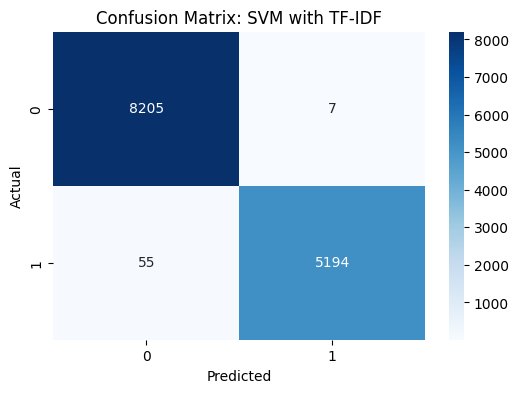

SVM with TF-IDF - Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      8212
           1       1.00      0.99      0.99      5249

    accuracy                           1.00     13461
   macro avg       1.00      0.99      1.00     13461
weighted avg       1.00      1.00      1.00     13461



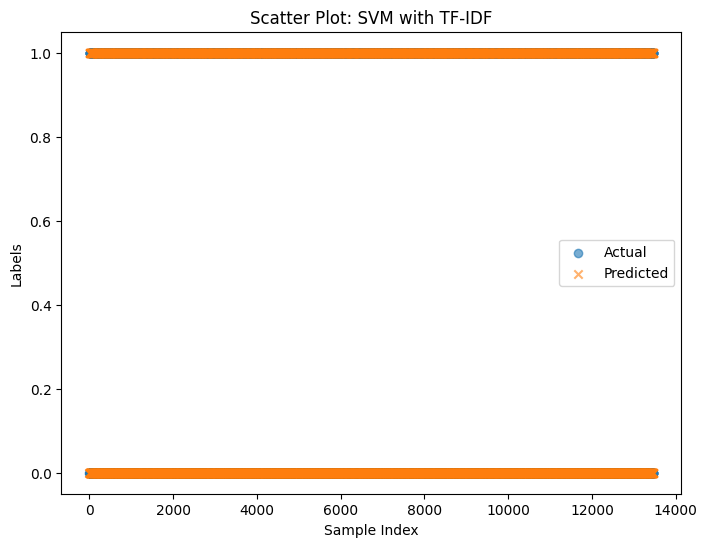

In [39]:
svm_model_tfidf = SVC(class_weight='balanced',random_state=42,kernel='rbf',gamma='scale',C=1)
evaluate_model_with_visualizations(svm_model_tfidf, X_train_tfidf, X_test_tfidf, y_train, y_test, "SVM", "TF-IDF")

Performing 5-Fold Cross-Validation for SVM with Word2Vec...
SVM with Word2Vec - Cross-validation Scores: [0.98599172 0.98790194 0.98885528 0.98742238 0.98805923]
SVM with Word2Vec - Mean CV Accuracy: 0.9876


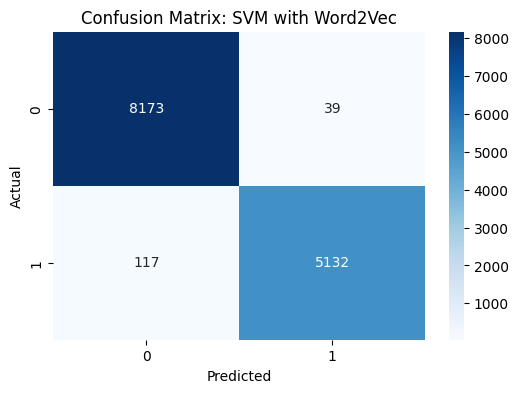

SVM with Word2Vec - Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8212
           1       0.99      0.98      0.99      5249

    accuracy                           0.99     13461
   macro avg       0.99      0.99      0.99     13461
weighted avg       0.99      0.99      0.99     13461



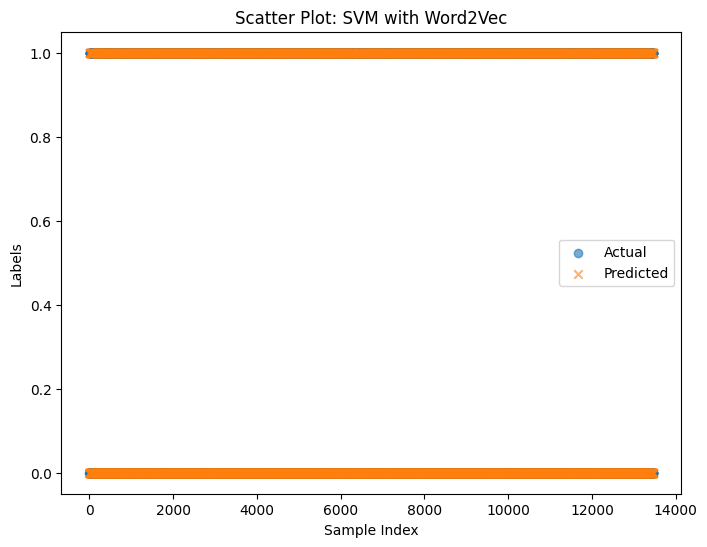

In [40]:
svm_model_word2vec = SVC(class_weight='balanced',random_state=42, C=1, kernel='rbf', gamma='scale')
evaluate_model_with_visualizations(svm_model_word2vec, X_train_word2vec, X_test_word2vec, y_train, y_test, "SVM", "Word2Vec")

Performing 5-Fold Cross-Validation for SVM with Doc2Vec...


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


SVM with Doc2Vec - Cross-validation Scores: [0.9512894  0.95431391 0.95032638 0.94921191 0.95351059]
SVM with Doc2Vec - Mean CV Accuracy: 0.9517


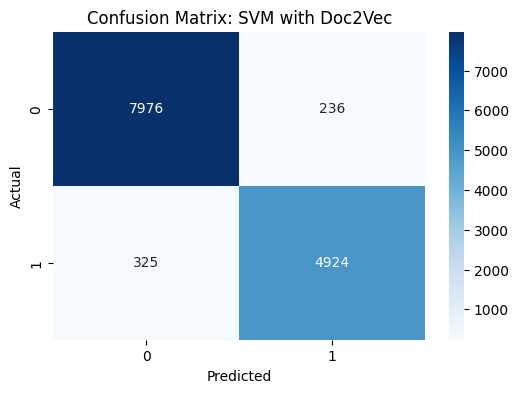

SVM with Doc2Vec - Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      8212
           1       0.95      0.94      0.95      5249

    accuracy                           0.96     13461
   macro avg       0.96      0.95      0.96     13461
weighted avg       0.96      0.96      0.96     13461



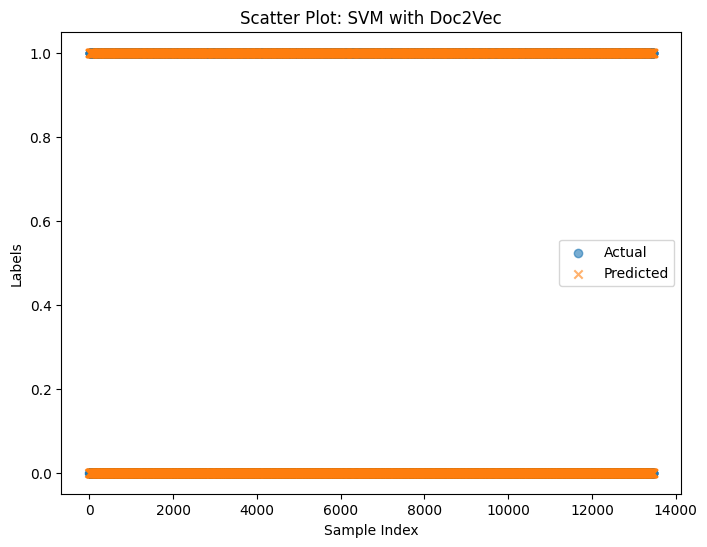

In [41]:
svm_model_doc2vec = SVC(class_weight='balanced',random_state=42, C=1, kernel='rbf', gamma='scale')
evaluate_model_with_visualizations(svm_model_doc2vec, X_train_doc2vec, X_test_doc2vec, y_train, y_test, "SVM", "Doc2Vec")

Performing 5-Fold Cross-Validation for Decision Tree with TF-IDF...
Decision Tree with TF-IDF - Cross-validation Scores: [0.92645654 0.92311366 0.92612641 0.91768827 0.92501194]
Decision Tree with TF-IDF - Mean CV Accuracy: 0.9237


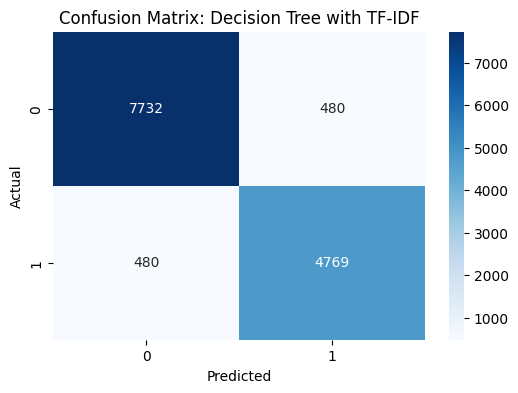

Decision Tree with TF-IDF - Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      8212
           1       0.91      0.91      0.91      5249

    accuracy                           0.93     13461
   macro avg       0.93      0.93      0.93     13461
weighted avg       0.93      0.93      0.93     13461



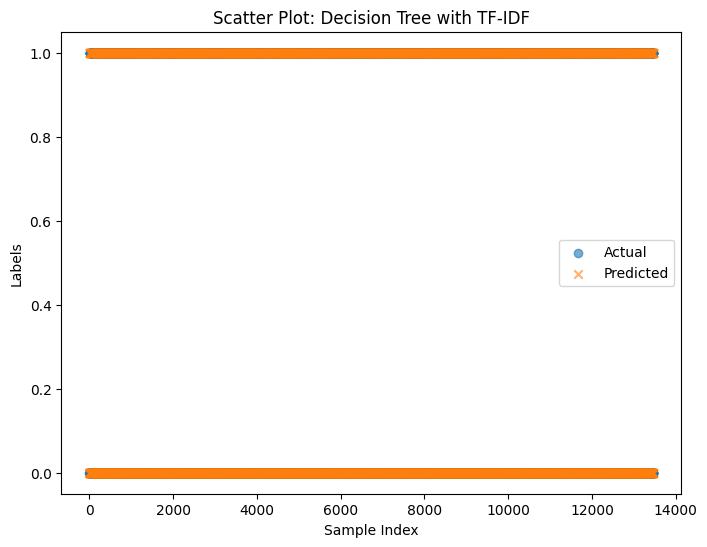

In [42]:
decision_tree_model_tfidf = DecisionTreeClassifier(class_weight='balanced',random_state=42, criterion='gini',max_depth=None,min_samples_split=5)
evaluate_model_with_visualizations(decision_tree_model_tfidf, X_train_tfidf, X_test_tfidf, y_train, y_test, "Decision Tree", "TF-IDF")

Performing 5-Fold Cross-Validation for Decision Tree with Word2Vec...
Decision Tree with Word2Vec - Cross-validation Scores: [0.92566062 0.9290035  0.9305843  0.93106193 0.92819615]
Decision Tree with Word2Vec - Mean CV Accuracy: 0.9289


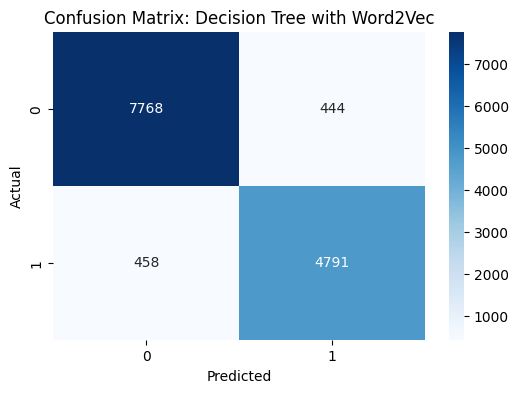

Decision Tree with Word2Vec - Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      8212
           1       0.92      0.91      0.91      5249

    accuracy                           0.93     13461
   macro avg       0.93      0.93      0.93     13461
weighted avg       0.93      0.93      0.93     13461



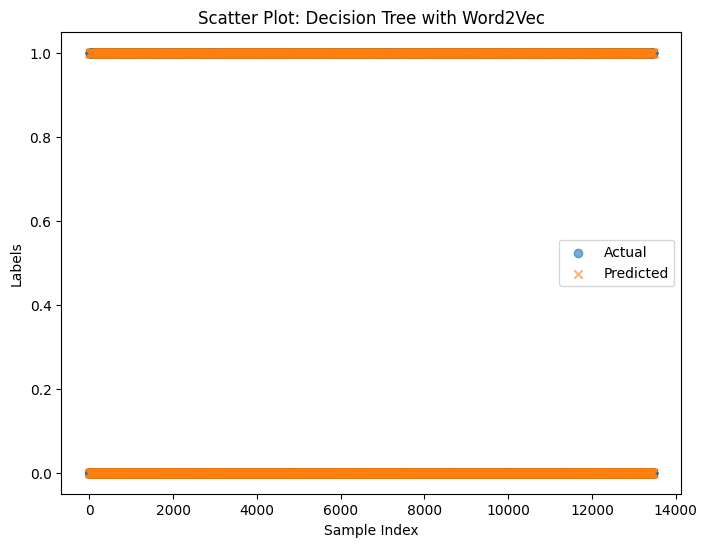

In [43]:
decision_tree_model_word2vec = DecisionTreeClassifier(class_weight='balanced',random_state=42, criterion='gini', max_depth=None, min_samples_split=5)
evaluate_model_with_visualizations(decision_tree_model_word2vec, X_train_word2vec, X_test_word2vec, y_train, y_test, "Decision Tree", "Word2Vec")

Performing 5-Fold Cross-Validation for Decision Tree with Doc2Vec...
Decision Tree with Doc2Vec - Cross-validation Scores: [0.62368672 0.6197071  0.63142812 0.62521891 0.63620443]
Decision Tree with Doc2Vec - Mean CV Accuracy: 0.6272


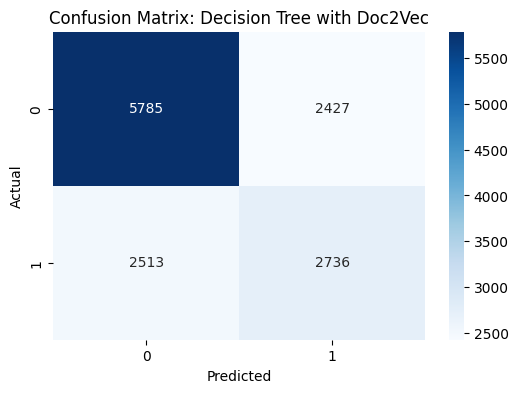

Decision Tree with Doc2Vec - Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.70      0.70      8212
           1       0.53      0.52      0.53      5249

    accuracy                           0.63     13461
   macro avg       0.61      0.61      0.61     13461
weighted avg       0.63      0.63      0.63     13461



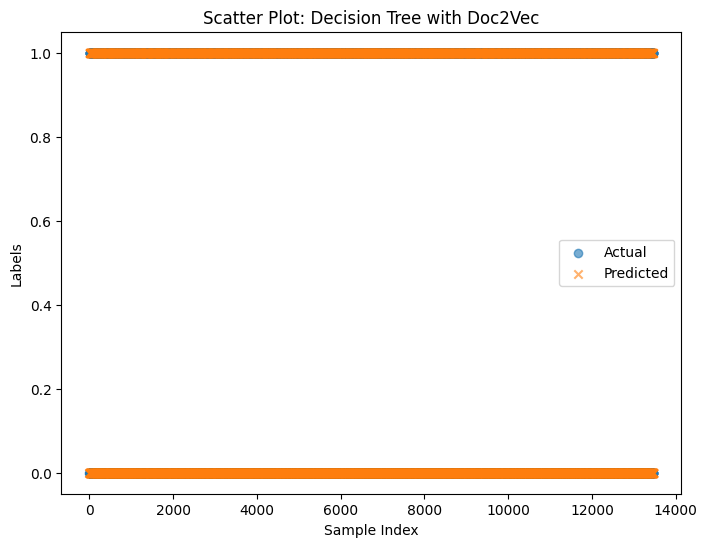

In [44]:
decision_tree_model_doc2vec = DecisionTreeClassifier(class_weight='balanced',random_state=42, max_depth=None, min_samples_split=5)
evaluate_model_with_visualizations(decision_tree_model_doc2vec, X_train_doc2vec, X_test_doc2vec, y_train, y_test, "Decision Tree", "Doc2Vec")

Performing 5-Fold Cross-Validation for Random Forest with TF-IDF...
Random Forest with TF-IDF - Cross-validation Scores: [0.98631009 0.98455906 0.98264608 0.98487502 0.98503423]
Random Forest with TF-IDF - Mean CV Accuracy: 0.9847


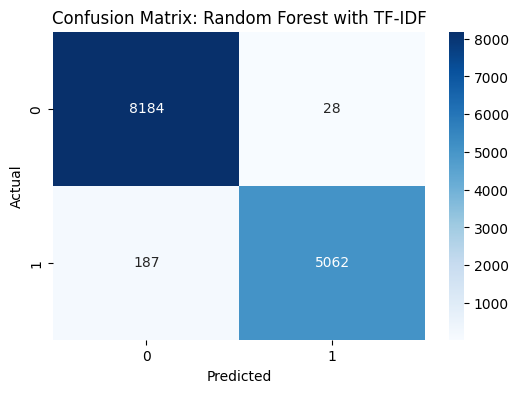

Random Forest with TF-IDF - Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8212
           1       0.99      0.96      0.98      5249

    accuracy                           0.98     13461
   macro avg       0.99      0.98      0.98     13461
weighted avg       0.98      0.98      0.98     13461



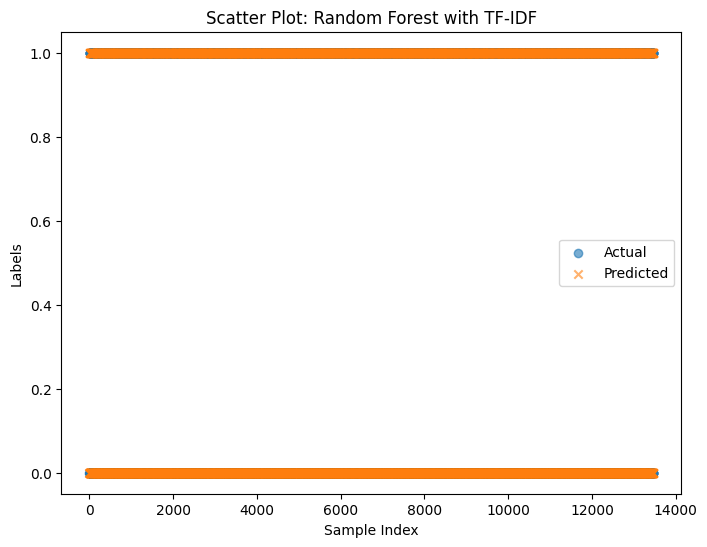

In [45]:
random_forest_model_tfidf = RandomForestClassifier(class_weight='balanced', random_state=42,n_estimators=200,max_depth=None,min_samples_split=5)
evaluate_model_with_visualizations(random_forest_model_tfidf, X_train_tfidf, X_test_tfidf, y_train, y_test, "Random Forest", "TF-IDF")

Performing 5-Fold Cross-Validation for Random Forest with Word2Vec...
Random Forest with Word2Vec - Cross-validation Scores: [0.97962432 0.98360395 0.98264608 0.98057634 0.98169081]
Random Forest with Word2Vec - Mean CV Accuracy: 0.9816


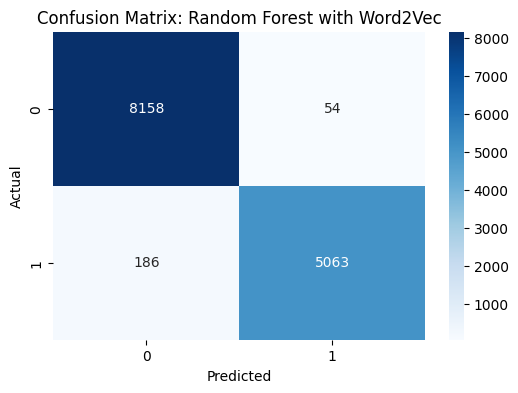

Random Forest with Word2Vec - Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      8212
           1       0.99      0.96      0.98      5249

    accuracy                           0.98     13461
   macro avg       0.98      0.98      0.98     13461
weighted avg       0.98      0.98      0.98     13461



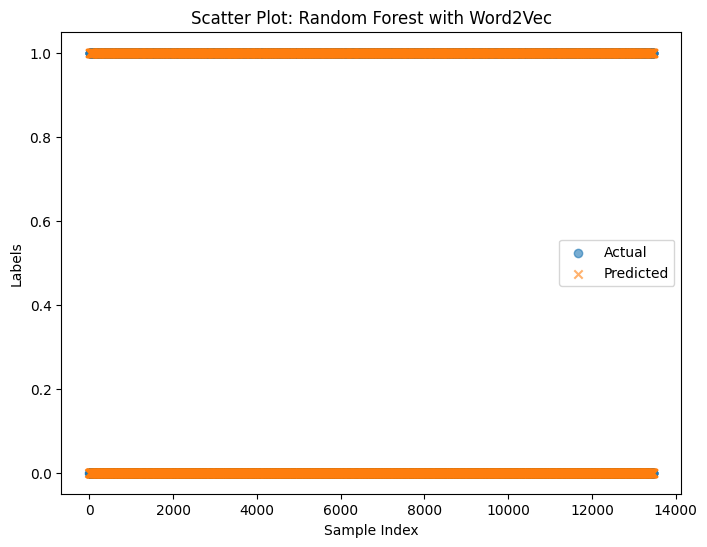

In [46]:
random_forest_model_word2vec = RandomForestClassifier(class_weight='balanced',random_state=42, n_estimators=200, max_depth=None, min_samples_split=5)
evaluate_model_with_visualizations(random_forest_model_word2vec, X_train_word2vec, X_test_word2vec, y_train, y_test, "Random Forest", "Word2Vec")

Performing 5-Fold Cross-Validation for Random Forest with Doc2Vec...
Random Forest with Doc2Vec - Cross-validation Scores: [0.7585164  0.75501433 0.75593058 0.75226875 0.76198058]
Random Forest with Doc2Vec - Mean CV Accuracy: 0.7567


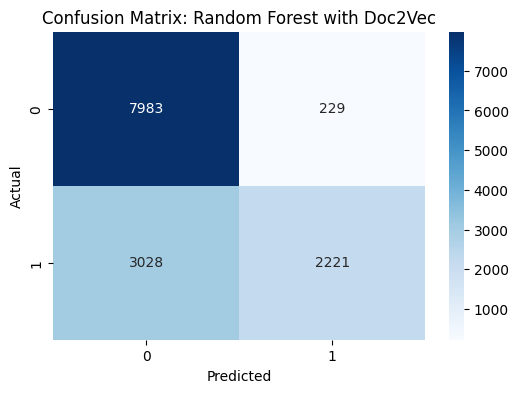

Random Forest with Doc2Vec - Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.97      0.83      8212
           1       0.91      0.42      0.58      5249

    accuracy                           0.76     13461
   macro avg       0.82      0.70      0.70     13461
weighted avg       0.80      0.76      0.73     13461



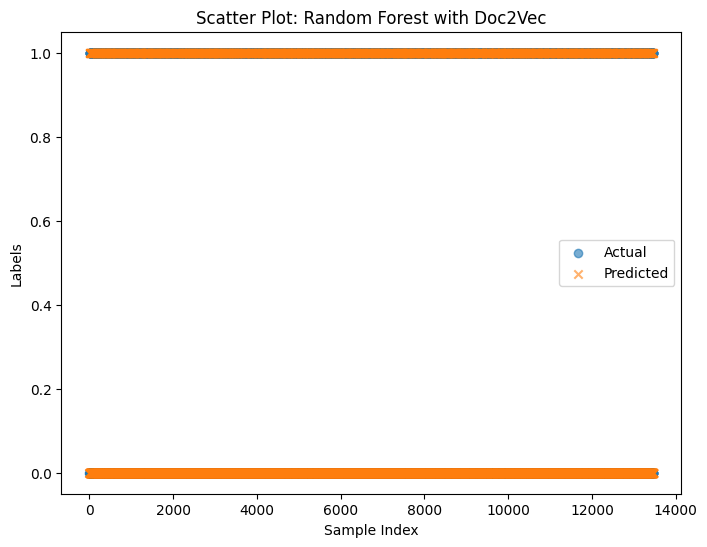

In [47]:
random_forest_model_doc2vec = RandomForestClassifier(class_weight='balanced',random_state=42, n_estimators=200, max_depth=None, min_samples_split=5)
evaluate_model_with_visualizations(random_forest_model_doc2vec, X_train_doc2vec, X_test_doc2vec, y_train, y_test, "Random Forest", "Doc2Vec")

Performing 5-Fold Cross-Validation for KNN with TF-IDF...
KNN with TF-IDF - Cross-validation Scores: [0.97580388 0.97994269 0.97850661 0.97786977 0.97452635]
KNN with TF-IDF - Mean CV Accuracy: 0.9773


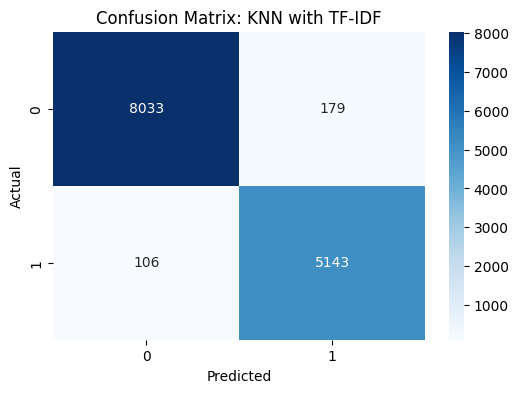

KNN with TF-IDF - Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      8212
           1       0.97      0.98      0.97      5249

    accuracy                           0.98     13461
   macro avg       0.98      0.98      0.98     13461
weighted avg       0.98      0.98      0.98     13461



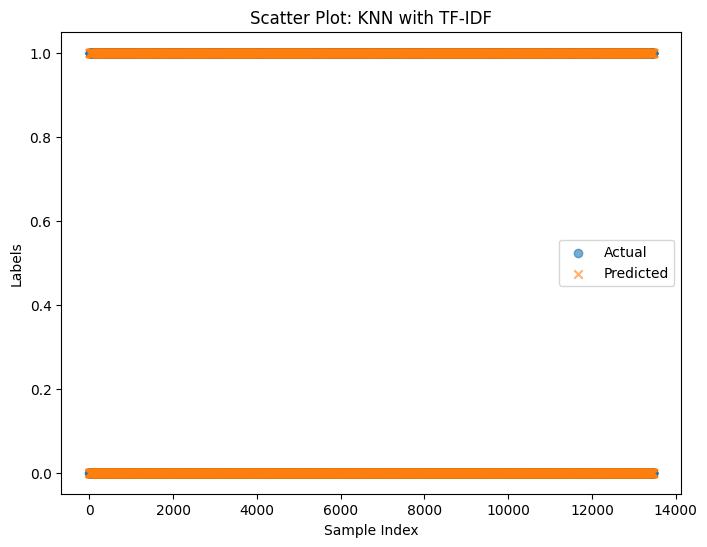

In [48]:
knn_model_tfidf = KNeighborsClassifier(n_neighbors=3,weights='distance',metric='minkowski')
evaluate_model_with_visualizations(knn_model_tfidf, X_train_tfidf, X_test_tfidf, y_train, y_test, "KNN", "TF-IDF")

Performing 5-Fold Cross-Validation for KNN with Word2Vec...
KNN with Word2Vec - Cross-validation Scores: [0.98344476 0.98758357 0.98551186 0.98710396 0.98535265]
KNN with Word2Vec - Mean CV Accuracy: 0.9858


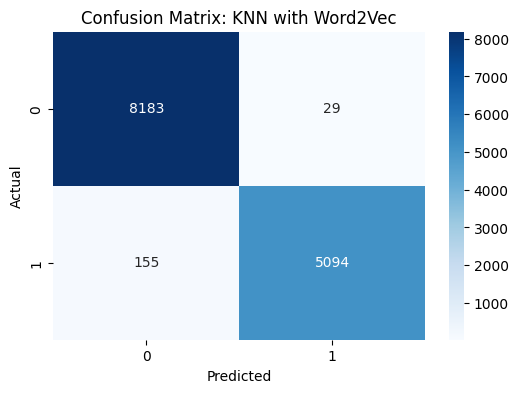

KNN with Word2Vec - Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8212
           1       0.99      0.97      0.98      5249

    accuracy                           0.99     13461
   macro avg       0.99      0.98      0.99     13461
weighted avg       0.99      0.99      0.99     13461



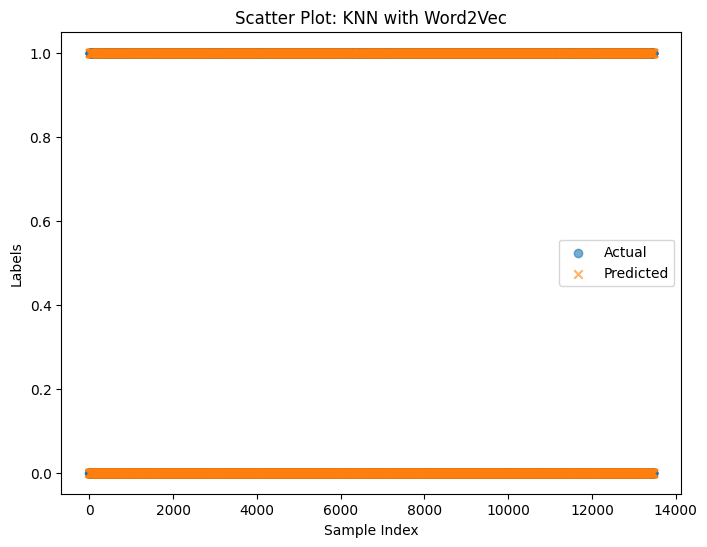

In [49]:
knn_model_word2vec = KNeighborsClassifier(n_neighbors=4,weights='distance',metric='minkowski')
evaluate_model_with_visualizations(knn_model_word2vec, X_train_word2vec, X_test_word2vec, y_train, y_test, "KNN", "Word2Vec")

Performing 5-Fold Cross-Validation for KNN with Doc2Vec...
KNN with Doc2Vec - Cross-validation Scores: [0.60458453 0.59694365 0.60579526 0.59687948 0.57904792]
KNN with Doc2Vec - Mean CV Accuracy: 0.5967


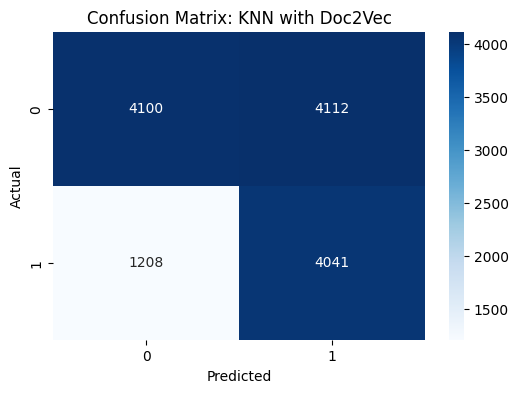

KNN with Doc2Vec - Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.50      0.61      8212
           1       0.50      0.77      0.60      5249

    accuracy                           0.60     13461
   macro avg       0.63      0.63      0.60     13461
weighted avg       0.66      0.60      0.61     13461



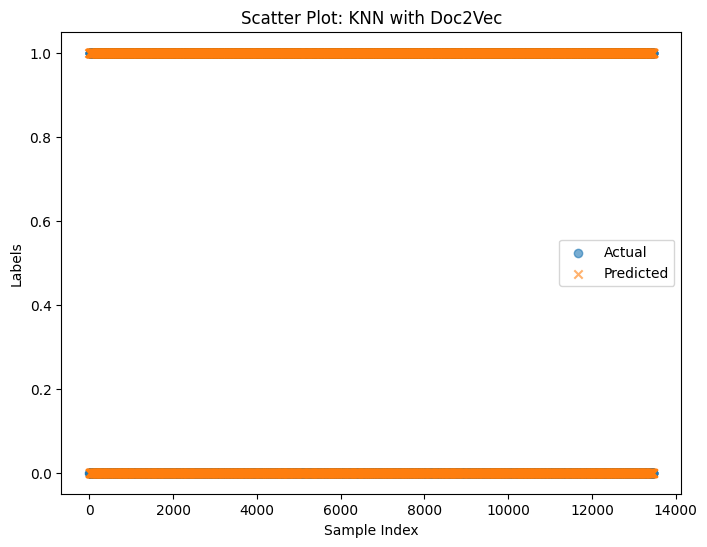

In [50]:
knn_model_doc2vec = KNeighborsClassifier(n_neighbors=2,weights='distance',metric='minkowski')
evaluate_model_with_visualizations(knn_model_doc2vec, X_train_doc2vec, X_test_doc2vec, y_train, y_test, "KNN", "Doc2Vec")

#**Implementing the best embedding technique for each model and using it on custom data**


#1.   SVM :- TF-IDF
#2.   Decision Tree :- Word2Vec
#3.   Random Forest :- TF-IDF
#4.   KNN :- Word2Vec  



In [51]:
# svm_model = SVC(class_weight='balanced',random_state=42)
# svm_model.fit(X_train_tfidf, y_train)

# decision_tree_model = DecisionTreeClassifier(random_state=42)
# decision_tree_model.fit(X_train_word2vec, y_train)

# random_forest_model = RandomForestClassifier(random_state=42)
# random_forest_model.fit(X_train_tfidf, y_train)

# knn_model = KNeighborsClassifier(n_neighbors=3)
# knn_model.fit(X_train_word2vec, y_train)

In [ ]:
custom_data = input()
#custom_data = "Good Morning Everyone, I am your teacher for today"
preprocessed_custom_data = preprocess(custom_data)
print(preprocessed_custom_data)
#for word in preprocessed_custom_data.split():
#    if word not in word2vec_model.wv:
#        print(f"Missing word: {word}")

custom_data_tfidf = tfidf_vectorizer.transform([preprocessed_custom_data])

#def update_word2vec_with_custom_data(preprocessed_data, word2vec_model):
#    """Updating Word2Vec model with custom data if new words are found."""
#    new_sentences = [preprocessed_data.split()]

#    word2vec_model.build_vocab(new_sentences, update=True)
#    word2vec_model.train(new_sentences, total_examples=len(new_sentences), epochs=5)


#update_word2vec_with_custom_data(preprocessed_custom_data, word2vec_model)

#custom_data_word2vec = [calculate_average_word_vector(preprocessed_custom_data.split(), word2vec_model, word2vec_model.vector_size)]
custom_data_word2vec = np.array([calculate_average_word_vector(preprocessed_custom_data.split(), word2vec_model, word2vec_model.vector_size)]).reshape(1, -1)

print(custom_data_tfidf.shape)
print(custom_data_word2vec.shape)


prediction_svm = svm_model_tfidf.predict(custom_data_tfidf)
print("Prediction using SVM using TF-IDF:", prediction_svm)
prediction_svm = svm_model_word2vec.predict(custom_data_word2vec)
print("Prediction using SVM using Word2Vec:", prediction_svm)

prediction_decision_tree = decision_tree_model_tfidf.predict(custom_data_tfidf)
print("Prediction using Decision Tree using TF-IDF:", prediction_decision_tree)
prediction_decision_tree = decision_tree_model_word2vec.predict(custom_data_word2vec)
print("Prediction using Decision Tree using Word2Vec:", prediction_decision_tree)

prediction_random_forest = random_forest_model_tfidf.predict(custom_data_tfidf)
print("Prediction using Random Forest using TF-IDF:", prediction_random_forest)
prediction_random_forest = random_forest_model_word2vec.predict(custom_data_word2vec)
print("Prediction using Random Forest using Word2Vec:", prediction_random_forest)

prediction_knn = knn_model_tfidf.predict(custom_data_tfidf)
print("Prediction using KNN using TF-IDF:", prediction_knn)
prediction_knn = knn_model_word2vec.predict(custom_data_word2vec)
print("Prediction using KNN using Word2Vec:", prediction_knn)